In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#get the features from the file
features = list()
with open('/content/features.txt') as f:
  features = [line.split()[1] for line in f.readlines()]
print('No of features :',len(features))


No of features : 561


# Loading the training dataset

In [ ]:
X_train = pd.read_csv('/content/X_train.txt',delim_whitespace=True,header=None,encoding = 'latin-1')
X_train.columns = features

# Remove squeeze=True and add .squeeze() after the function call
X_train['subject'] = pd.read_csv('/content/subject_train.txt',header=None)

Y_train = pd.read_csv('/content/y_train.txt',names=['Activity']) # Remove squeeze=True and add .squeeze() after the function call
# Change Y_train.map to Y_train['Activity'].map
Y_train_labels = Y_train['Activity'].map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})

#put all columns in a single dataframe
train = X_train
train['Activity'] =Y_train
train['ActivityName'] = Y_train_labels
train.head()

<ipython-input-8-610a099c84fd>:1: DtypeWarning: Columns (506) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv('/content/X_train.txt',delim_whitespace=True,header=None,encoding = 'latin-1')


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
train.shape

(5723, 564)

# Loading the Test dataset

In [ ]:
X_test = pd.read_csv('/content/X_test.txt',delim_whitespace=True,header=None,encoding = 'latin-1')
X_test.columns = features

X_test['subject'] = pd.read_csv('/content/subject_test.txt',header=None).squeeze()

Y_test = pd.read_csv('/content/y_test.txt',names=['Activity']).squeeze()
Y_test_labels = Y_test.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})

#put all columns in a single dataframe
test = X_test
test['Activity'] =Y_test
test['ActivityName'] = Y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
test.shape

(2947, 564)

# **Data cleaning**

In [ ]:
#check for duplicates

print('No of duplicates in train:', sum(train.duplicated()))
print('No of duplicates in test:', sum(test.duplicated()))

No of duplicates in train: 0
No of duplicates in test: 0


In [ ]:
#checking for NAN/ NULL values

print('No of NAN/ NULL values in train:', train.isnull().values.sum())
print('No of NAN/ NULL values in test:', test.isnull().values.sum())

No of NAN/ NULL values in train: 54
No of NAN/ NULL values in test: 0


In [ ]:
#check for data imbalance

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] ='Dejavu Sans'



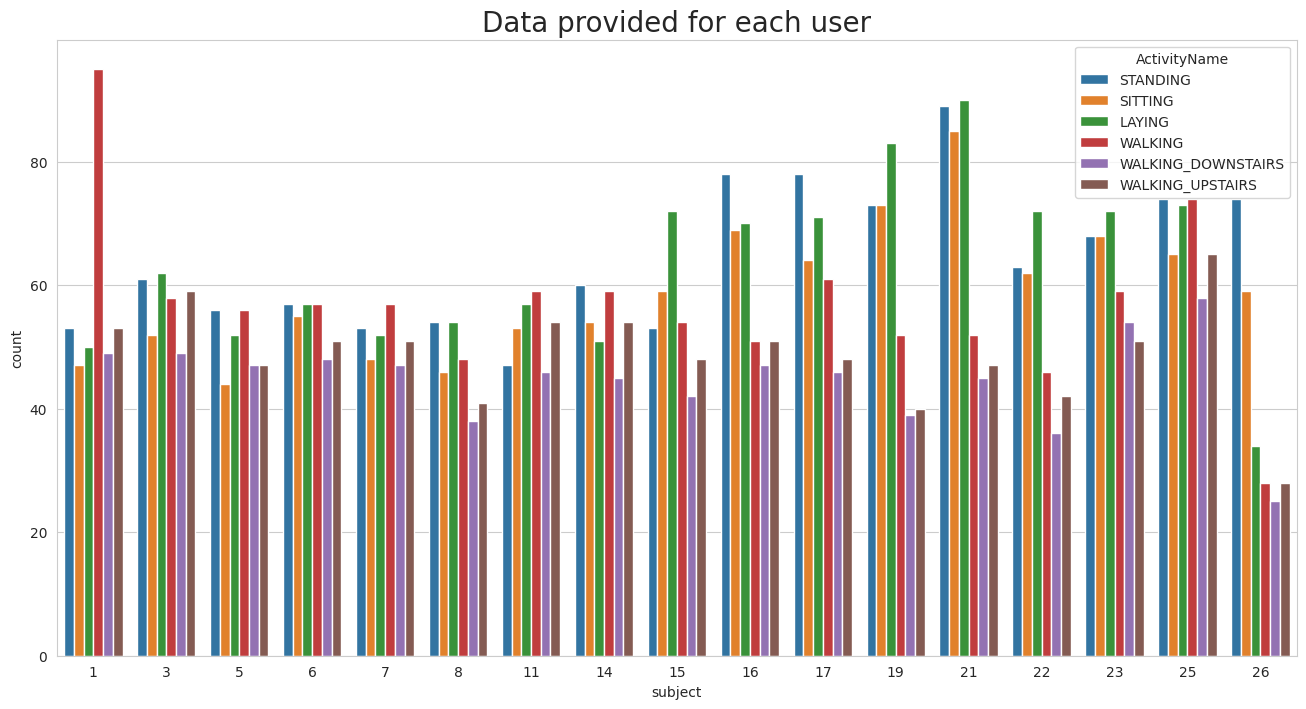

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided for each user',fontsize=20)
sns.countplot(x='subject',hue ='ActivityName',data=train)
plt.show()

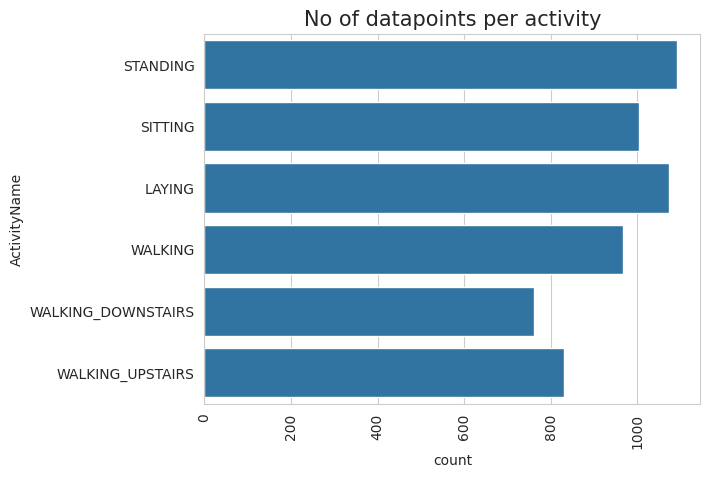

In [ ]:
plt.title('No of datapoints per activity',fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

# Changing the feature names

In [ ]:
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns =columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [ ]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

# Applying t-sne on the data

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        # Perform t-SNE
        print(f'\nPerforming t-SNE with perplexity {perplexity} and {n_iter} iterations at max...')
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_iter=n_iter).fit_transform(X_data)
        print('Done.')

        # Prepare the data for seaborn
        print('Creating plot for this t-SNE visualization...')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})

        # Draw the plot
        plt.figure(figsize=(8, 8))
        sns.scatterplot(data=df, x='x', y='y', hue='label', palette="Set1", markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title(f"Perplexity: {perplexity} and Max Iterations: {n_iter}")

        img_name = f"{img_name_prefix}_perp_{perplexity}_iter_{n_iter}.png"
        print(f'Saving this plot as image in the present working directory: {img_name}...')
        plt.savefig(img_name)
        plt.show()
        print('Done.')



# Obtain train and test data

In [ ]:
train = pd.read_csv('/content/train.csv',low_memory=False)
test = pd.read_csv('/content/test.csv')

In [ ]:
print(train.shape,test.shape)

(5723, 564) (2947, 564)


In [ ]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [ ]:
test.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING


In [ ]:
X_train = train.drop(['subject','Activity','ActivityName'],axis = 1)
y_train = train.ActivityName

In [ ]:
X_test = test.drop(['subject','Activity','ActivityName'],axis = 1)
y_test = test.ActivityName

In [ ]:
print("X_train and y_train:",X_train.shape,y_train.shape)
print("X_test and y_test:",X_test.shape,y_test.shape)

X_train and y_train: (5723, 561) (5723,)
X_test and y_test: (2947, 561) (2947,)


# Lets model with our data

In [ ]:
labels =['LAYING','SITING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Generic function to run any model specified

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import metrics

def perform_model(model, X_train, y_train, X_test, y_test, class_labels,
                  cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    # Dictionary to store results at various phases
    results = {}

    # Time at which model starts training
    train_start_time = datetime.now()
    print('Training the model...')

    # Fit the model
    model.fit(X_train, y_train)
    print('Done \n')

    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('Training time (HH:MM:SS.ms): {}\n'.format(results['training_time']))

    # Predict test data
    print('Predicting test data...')
    test_start_time = datetime.now()

    y_pred = model.predict(X_test)

    test_end_time = datetime.now()
    print('Done \n')

    results['testing_time'] = test_end_time - test_start_time
    print('Testing time (HH:MM:SS.ms): {}\n'.format(results['testing_time']))

    # Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    print('--')
    print('| Accuracy: {:.4f}'.format(accuracy))
    print('--')

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm

    if print_cm:
        print('Confusion Matrix:')
        print('\n{}'.format(cm))

        # Plot confusion matrix
        plt.figure(figsize=(8, 8))
        plt.grid(False)
        plot_confusion_matrix(cm, classes=class_labels, normalize=cm_normalize,
                              title='Normalized Confusion Matrix', cmap=cm_cmap)
        plt.show()

    # Get classification report
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print('Classification Report:\n{}'.format(classification_report))
    print('\nAccuracy: {:.4f}\n'.format(accuracy))

    return results




# Method to print grid search attributes

In [ ]:
def print_grid_search_attributes(grid_search_model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('Best Estimator:')
    print('\n\t{}'.format(grid_search_model.best_estimator_))

    # Parameters that gave best results while performing grid search
    print('Best parameters:')
    print('\n\tParameters of best estimator: \n\n\t{}\n'.format(grid_search_model.best_params_))

    # Number of cross-validation splits
    print('No of Cross-Validation sets:')
    print('\n\tTotal number of cross-validation sets: {}\n'.format(grid_search_model.n_splits_))

    # Average cross-validated score of the best estimator, from the Grid Search
    print('Best Score:')
    print("\n\tAverage Cross-Validate scores of best estimator: \n\n\t{}\n".format(grid_search_model.best_score_))




# Logistic Regression with grid search

In [ ]:
# Convert all columns to numeric, forcing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean (or another appropriate strategy)
X_train.fillna(X_train.mean(), inplace=True)


Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 

Training time (HH:MM:SS.ms): 0:02:16.476305

Predicting test data...
Done 

Testing time (HH:MM:SS.ms): 0:00:00.015102

--
| Accuracy: 0.9589
--
Confusion Matrix:

[[537   0   0   0   0   0]
 [  0 426  62   0   0   3]
 [  0  12 518   2   0   0]
 [  0   0   0 494   2   0]
 [  0   0   1   6 406   7]
 [  0   0   0  21   5 445]]


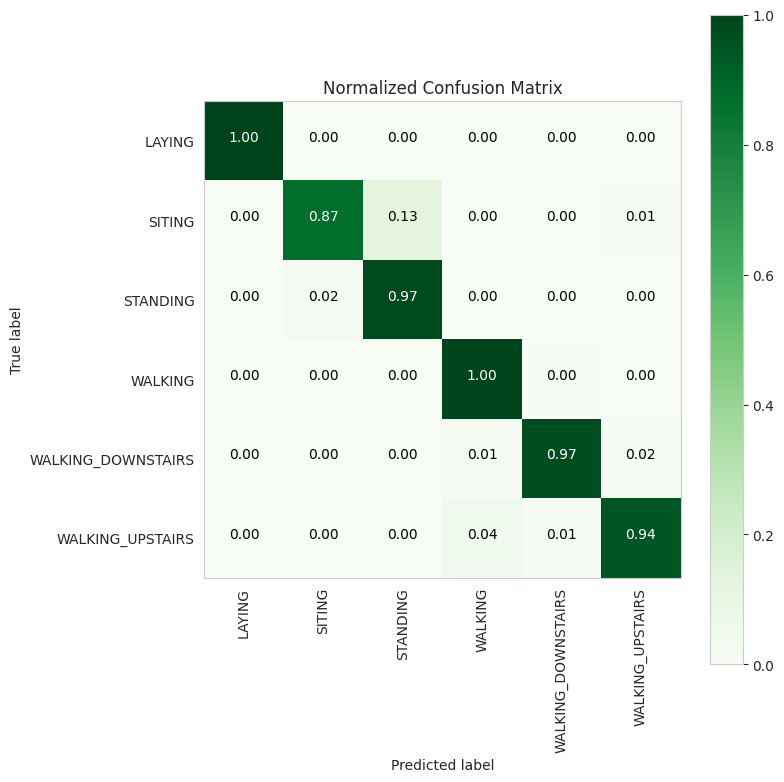

In [ ]:
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV

# Start Grid Search
parameters = {
    'C': [0.01, 0.1, 1, 10, 20, 30],
    'penalty': ['l1', 'l2']
}

# Create the Logistic Regression model
log_reg = linear_model.LogisticRegression(solver='liblinear')  # Use 'liblinear' for L1 penalty

# Setup the Grid Search
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

# Fit the model and store the results
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


Linear SVC with grid search

In [ ]:
from sklearn.svm import LinearSVC

Training the model...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Done 

Training time (HH:MM:SS.ms): 0:01:50.293950

Predicting test data...
Done 

Testing time (HH:MM:SS.ms): 0:00:00.013199

--
| Accuracy: 0.9559
--
Confusion Matrix:

[[529   0   8   0   0   0]
 [  0 433  55   0   0   3]
 [  0  15 515   2   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   6 409   5]
 [  0   0   0  33   1 437]]


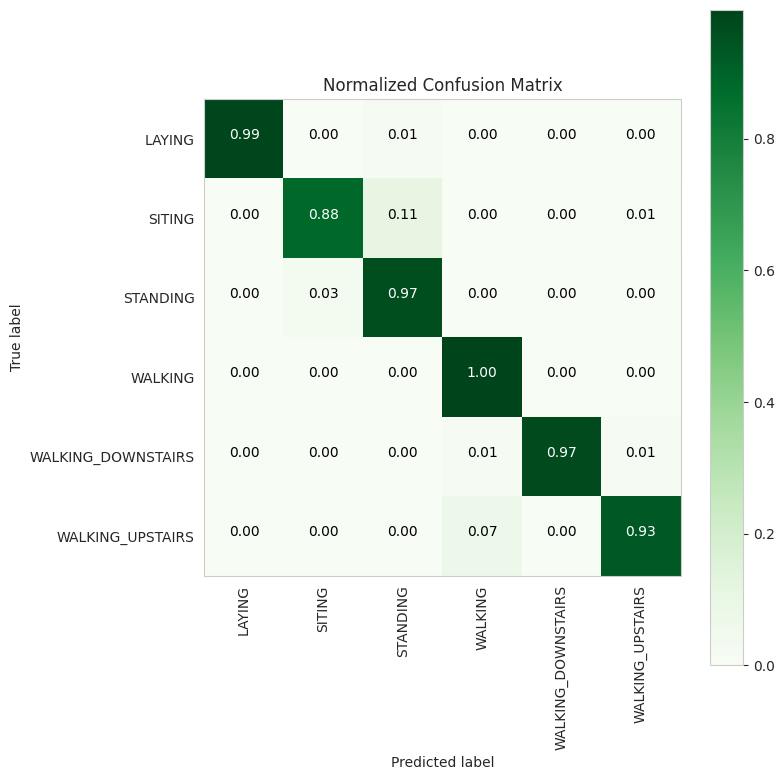

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.92      1.00      0.96       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      0.93      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


Accuracy: 0.9559



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define parameters for Grid Search
parameters = {'C': [0.125, 0.5, 2, 8, 16]}  # Fixed syntax error

# Create the Linear SVC model
lr_svc = LinearSVC(tol=0.00005)

# Setup the Grid Search
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

# Fit the model and store the results
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)


# Kernel SVM with grid search

Training the model...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Done 

Training time (HH:MM:SS.ms): 0:05:53.284595

Predicting test data...
Done 

Testing time (HH:MM:SS.ms): 0:00:01.410288

--
| Accuracy: 0.9549
--
Confusion Matrix:

[[537   0   0   0   0   0]
 [  0 442  47   0   0   2]
 [  0  17 515   0   0   0]
 [  0   0   0 487   4   5]
 [  0   0   0   9 390  21]
 [  0   0   0  26   2 443]]


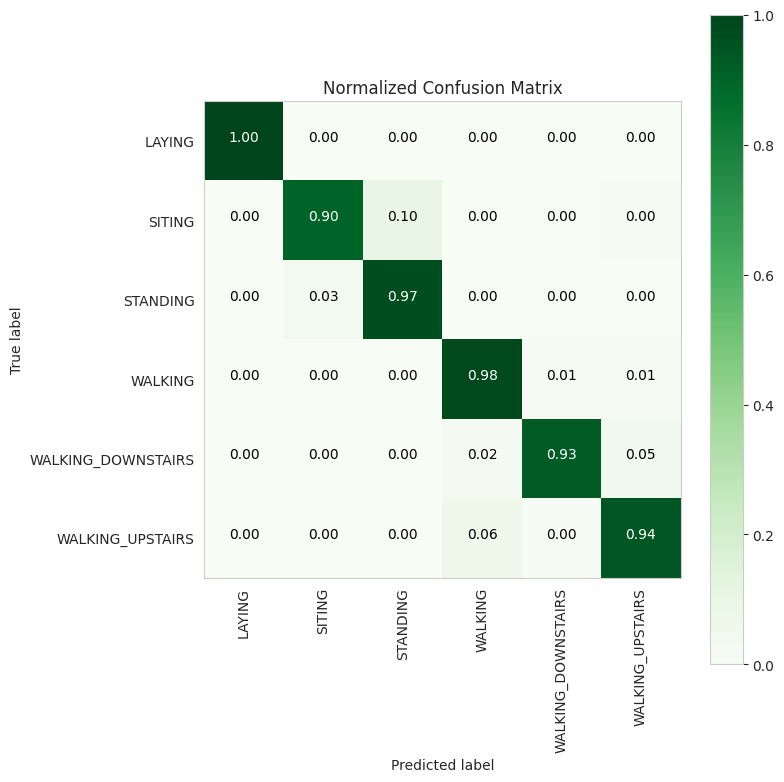

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.90      0.93       491
          STANDING       0.92      0.97      0.94       532
           WALKING       0.93      0.98      0.96       496
WALKING_DOWNSTAIRS       0.98      0.93      0.96       420
  WALKING_UPSTAIRS       0.94      0.94      0.94       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947


Accuracy: 0.9549



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameters for Grid Search
parameters = {
    'C': [2, 8, 16],
    'gamma': [0.0078125, 0.125, 2]
}

# Create the RBF SVM model
rbf_svm = SVC(kernel='rbf')

# Setup the Grid Search
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters, n_jobs=-1, verbose=1)

# Fit the model and store the results
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)


# Decision tree with grid search CV

Training the model...
Done 

Training time (HH:MM:SS.ms): 0:00:44.162848

Predicting test data...
Done 

Testing time (HH:MM:SS.ms): 0:00:00.011804

--
| Accuracy: 0.8656
--
Confusion Matrix:

[[537   0   0   0   0   0]
 [  0 398  93   0   0   0]
 [  0  73 459   0   0   0]
 [  0   0   0 440  16  40]
 [  0   0   0  16 336  68]
 [  0   0   0  64  26 381]]


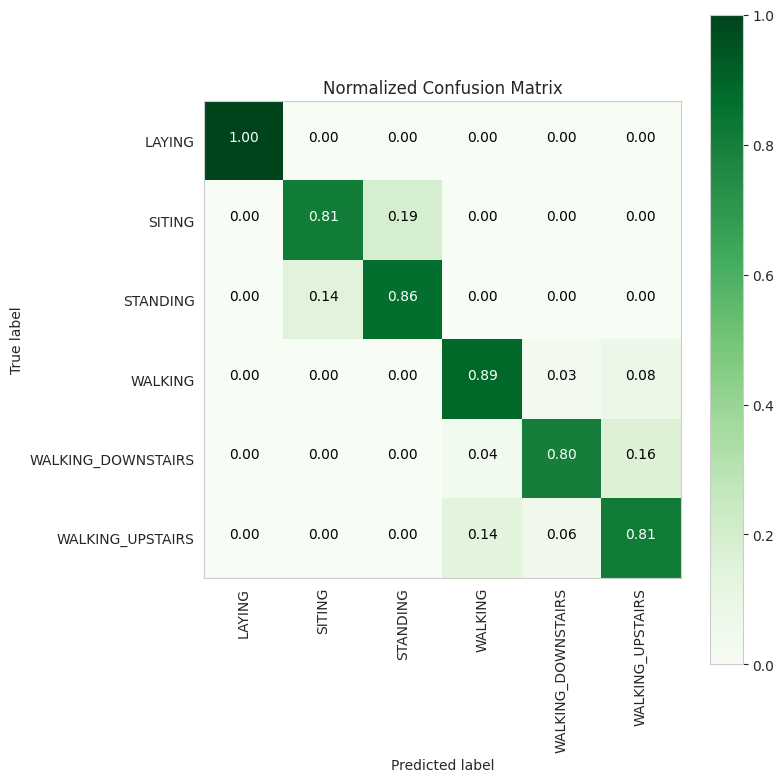

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.81      0.83       491
          STANDING       0.83      0.86      0.85       532
           WALKING       0.85      0.89      0.87       496
WALKING_DOWNSTAIRS       0.89      0.80      0.84       420
  WALKING_UPSTAIRS       0.78      0.81      0.79       471

          accuracy                           0.87      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.87      0.87      2947


Accuracy: 0.8656

Best Estimator:


AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_estimator_'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameters for Grid Search
parameters = {'max_depth': np.arange(3, 10, 2)}

# Create the Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Setup the Grid Search
dt_grid = GridSearchCV(dt, param_grid=parameters, n_jobs=-1)

# Fit the model and store the results
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Print the best model parameters and attributes from the Grid Search
#print_grid_search_attributes(dt_grid.best_estimator_)


In [ ]:
print('\nAccuracy and Error Rates\n')

# Logistic Regression Results
print('Logistic Regression: {:.4f}% Accuracy, {:.4f}% Error'.format(
    log_reg_grid_results['accuracy']*100, 100-(log_reg_grid_results['accuracy']*100)))

# Linear SVC Results
print('Linear SVC: {:.4f}% Accuracy, {:.4f}% Error'.format(
    lr_svc_grid_results['accuracy']*100, 100-(lr_svc_grid_results['accuracy']*100)))

# RBF SVM Classifier Results
print('RBF SVM Classifier: {:.4f}% Accuracy, {:.4f}% Error'.format(
    rbf_svm_grid_results['accuracy']*100, 100-(rbf_svm_grid_results['accuracy']*100)))

# Decision Tree Results
print('Decision Tree: {:.4f}% Accuracy, {:.4f}% Error'.format(
    dt_grid_results['accuracy']*100, 100-(dt_grid_results['accuracy']*100)))

# Random Forest Results
#print('Random Forest: {:.4f}% Accuracy, {:.4f}% Error'.format(
 #   rfc_grid_results['accuracy']*100, 100-(rfc_grid_results['accuracy']*100)))



Accuracy and Error Rates

Logistic Regression: 95.8941% Accuracy, 4.1059% Error
Linear SVC: 95.5887% Accuracy, 4.4113% Error
RBF SVM Classifier: 95.4869% Accuracy, 4.5131% Error
Decision Tree: 86.5626% Accuracy, 13.4374% Error
